# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
#Seu código de importação aqui
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=',')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefonico,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Forma_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,dsl,No,No,No,Month-to-month,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,dsl,Yes,No,No,One year,Mailed check,56.950,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,dsl,Yes,No,No,Month-to-month,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,dsl,Yes,Yes,No,One year,Bank transfer (automatic),75.400,1840.75,No
4,8191-XWSZG,F,0,No,No,52,Yes,no,No internet service,No internet service,No internet service,One year,Mailed check,28.000,1022.95,No
5,9959-WOFKT,Male,0,No,Yes,71,Yes,fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),75.400,7382.25,No
6,4190-MFLUW,F,0,Yes,Yes,10,Yes,dsl,No,Yes,No,Month-to-month,Credit card (automatic),74.925,528.35,Yes
7,4183-MYFRB,F,0,No,No,21,Yes,fiber optic,No,No,No,Month-to-month,Electronic check,80.450,1862.90,No
8,8779-QRDMV,Male,1,No,No,1,No,dsl,No,No,No,Month-to-month,Electronic check,80.450,39.65,Yes
9,1680-VDCWW,Male,0,Yes,No,12,Yes,no,No internet service,No internet service,No internet service,One year,Bank transfer (automatic),75.400,202.25,No


In [4]:
df.dtypes

customerID             object
Genero                 object
Idoso                   int64
Casado                 object
Dependentes            object
Tempo_como_Cliente      int64
Servico_Telefonico     object
Servico_Internet       object
Servico_Seguranca      object
Suporte_Tecnico        object
StreamingTV            object
Tipo_Contrato          object
Forma_Pagamento        object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                  object
dtype: object

In [5]:
df.isnull().sum()

customerID            0
Genero                0
Idoso                 0
Casado                0
Dependentes           0
Tempo_como_Cliente    0
Servico_Telefonico    0
Servico_Internet      0
Servico_Seguranca     0
Suporte_Tecnico       0
StreamingTV           0
Tipo_Contrato         0
Forma_Pagamento       0
Pagamento_Mensal      0
Total_Pago            0
Churn                 0
dtype: int64

# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [7]:
#Seu código aqui
df.describe().round(2)

,Idoso,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago
count,2488.00,2488.00,2488.00,2488.00
mean,0.16,32.35,65.70,2290.09
std,0.37,24.64,28.94,2264.59
min,0.00,0.00,18.40,18.80
25%,0.00,8.00,40.28,402.34
50%,0.00,29.00,74.92,1402.90
75%,0.00,56.00,87.71,3867.16
max,1.00,72.00,118.65,8564.75


# RESPOSTAS DAS LETRAS A e B : 
 - Analisando somente o describe, vejo que a **coluna Total_Pago** pode ter sim um outlier, já que 75% dos dados vão até 3867,16
e o max é 8564,75, um valor muito mais alto. Outro fator que indica um outlier é a diferença da média e mediana. A média está mais alta que a mediana
e isso pode indicar a presença de um outlier puxando a média para cima.
 - A **coluna de idoso** é 0 ou 1 então não temos o que analisar por aqui usando somente o describe.
 - A **coluna de Pagamento_Mensal** tem uma média proxima da mediana, embora a mediana esteja um pouco acima média. O valor de 75% está razoalvemente próximo ao do max. Não dá para saber se temos um outlier ou se é a distribuição dos valores que faz com que a mediana seja mais alta que a média. Precisaria de mais investigação.
 - A **coluna Tempo_Como_Cliente** pude verificar uma média próxima da mediana, e um valor de max um pouco acima do valor de 75%. No entanto o min é 0, indica que temos uma  amplitude grande. A mediana está somente um pouco mais abaixo da média. Aqui somente parece ter uma boa distribuição de valores, ou seja uma amplitude alta.

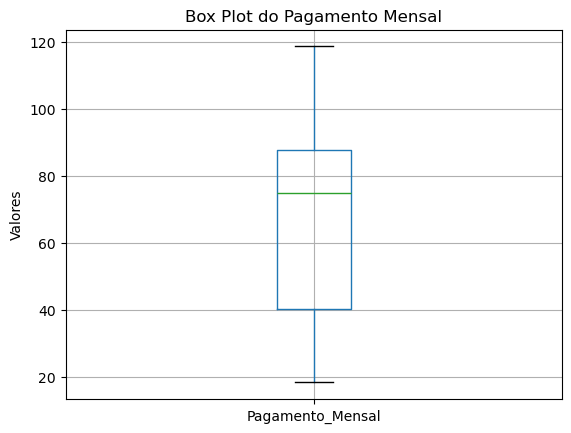

In [5]:
df.boxplot(column='Pagamento_Mensal')
plt.title('Box Plot do Pagamento Mensal')
plt.ylabel('Valores')
plt.show()

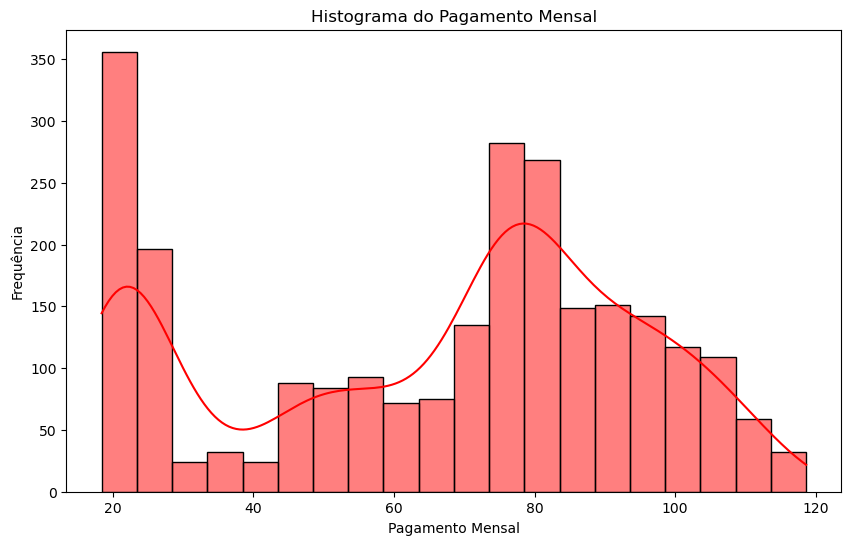

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Pagamento_Mensal', bins=20, kde=True, color='red')
plt.title('Histograma do Pagamento Mensal')
plt.xlabel('Pagamento Mensal')
plt.ylabel('Frequência')
plt.show()

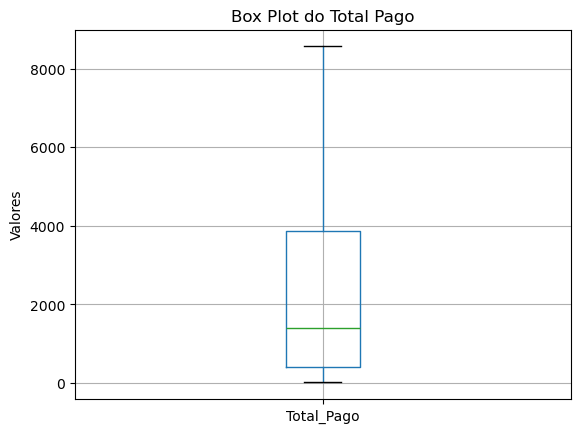

In [6]:
df.boxplot(column='Total_Pago')
plt.title('Box Plot do Total Pago')
plt.ylabel('Valores')
plt.show()

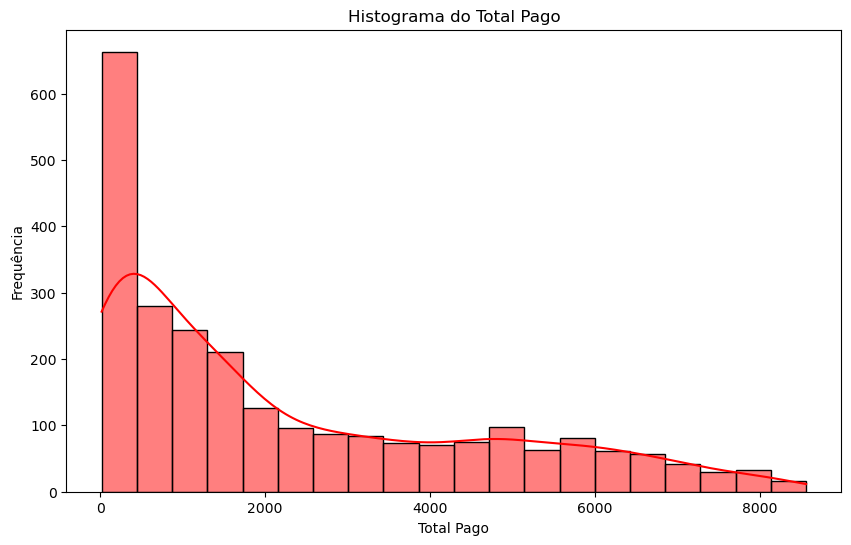

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total_Pago', bins=20, kde=True, color='red')
plt.title('Histograma do Total Pago')
plt.xlabel('Total Pago')
plt.ylabel('Frequência')
plt.show()

In [10]:
#verificando quantidade de linhas com o dado igual a 0
(df['Tempo_como_Cliente'] == 0).sum()

np.int64(5)

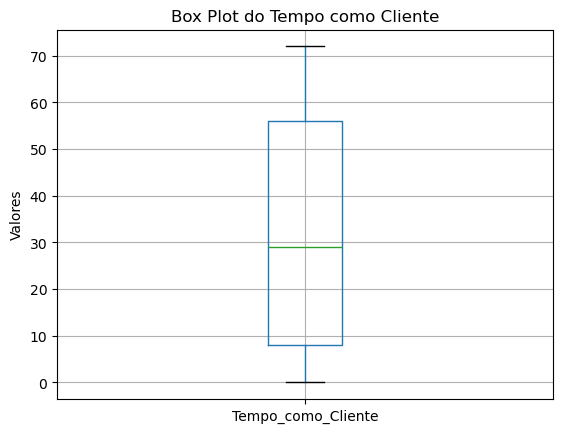

In [3]:
df.boxplot(column='Tempo_como_Cliente')
plt.title('Box Plot do Tempo como Cliente')
plt.ylabel('Valores')
plt.show()

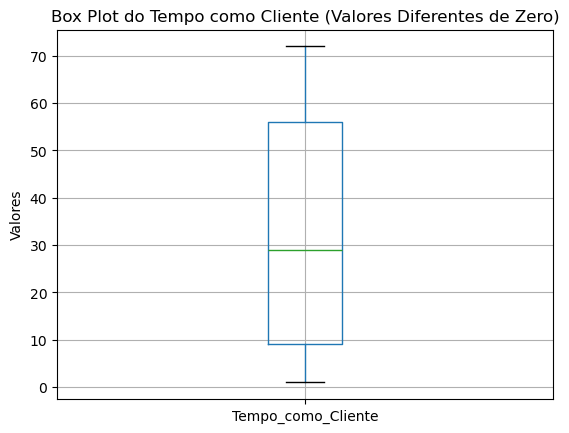

In [4]:
#nesse trecho do nosso código iremos selecionar os valores da coluna Tempo_como_Cliente que são diferentes de 0
df_nao_zero = df[df['Tempo_como_Cliente'] != 0]
df_nao_zero.boxplot(column='Tempo_como_Cliente')
plt.title('Box Plot do Tempo como Cliente (Valores Diferentes de Zero)')
plt.ylabel('Valores')
plt.show()

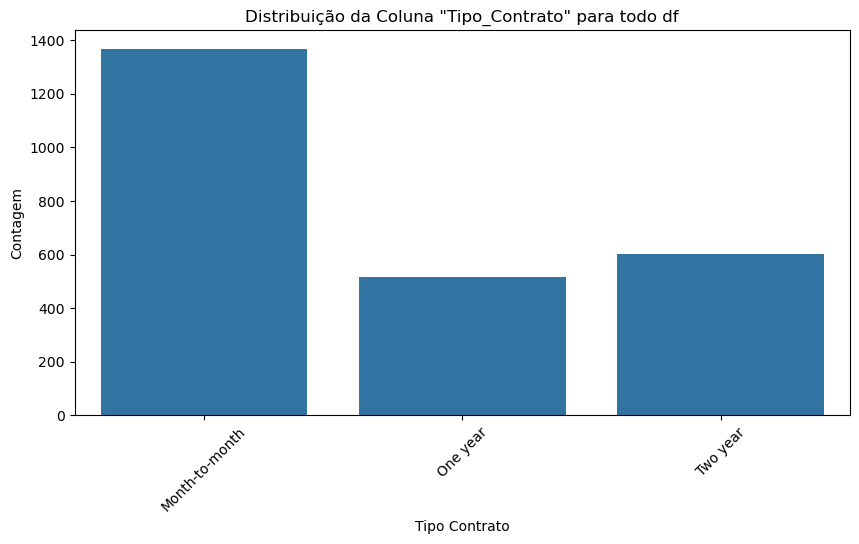

In [27]:
#Tipo_Contrato

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Tipo_Contrato')
plt.title('Distribuição da Coluna "Tipo_Contrato" para todo df')
plt.xlabel('Tipo Contrato')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

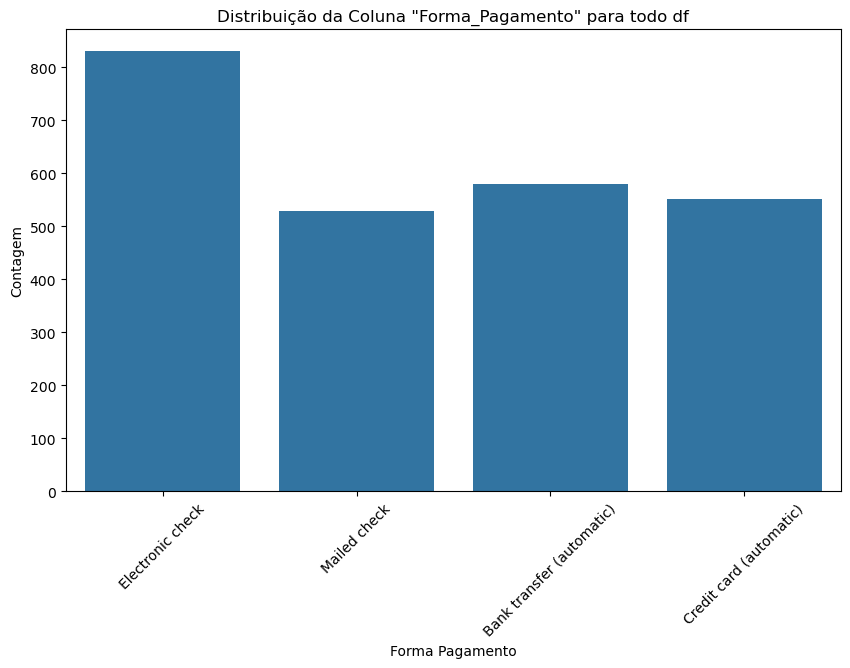

In [28]:
#Forma_Pagamento

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Forma_Pagamento')
plt.title('Distribuição da Coluna "Forma_Pagamento" para todo df')
plt.xlabel('Forma Pagamento')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

# RESPOSTA DA LETRA C

Para completar a análise univariada criei os seguintes gráficos para as seguintes colunas:
 - **Pagamento_Mensal :** foi criado um Box Plot para ele. Nele pude confirmar que o valor máximo é bem alto e a amplitude também é grande. Consegui verificar que a mediana está próximo dos 80. Não pude detectar a presença de outliers e como não consegui entender o porque da mediana ser maior do que a média, gerei um histograma para ver a frequencia de cada valor. No histograma consegui identificar que embora a maior quantidade de valores seja próximo aos 20, de 30 á 70 a frequencia é bem menor em comparação aos valores de 70 á 120. Temos dois picos também próximo ao valor de 80. Desta forma podemos verificar que temos uma maior quantidade de registros entre 70 e 120 do que entre 20 e 70. Portanto chego a conclusão que a média está sendo puxada para baixo devido ao pico em torno de 20, mas como a quantidade de valores é maior entre 70 e 120 a mediana acaba ficando alta. 

 - **Total_Pago:** Foi criado um Box Plot para esta coluna e pude conferir que 50% dos valores estão entre 0 e 4000 aproximadamente, embora ainda temos valores um pouco acima de 8000. Para confirmar a suspeita de termos a maior quantidade de valores entre 0 e 4000, criei um histograma e com ele confirmei o que pensava. A maior quantidade de valores se encontra entre 0 e 2000 caindo vigorosamente, e de 2000 a 4000 a queda é menos brusca. Valores próximos a 8000 são bem pequenos. 

 - **Tempo_como_Cliente:** Criei dois Box Plot, um com os valores 0 e outro sem os valores 0 e constatei que não havia nenhuma diferença perceptível. A amplitude é grande mas a mediana é a mais central em comparação as colunas anteriores. Vemos que 50 % dos dados estão entre 10 e 60 aproximadamente, embora os valores cheguem a 70 e partam de 0. 

 - **Tipo_Contrato:** Esta coluna por ser um campo de texto, gerei um gráfico de coluna. Tem três tipos de contrato mas não estão em equilíbrio, o mes a mes tem muito mais registros que os outros dois. Isso pode indicar um desbalanceamento nos dados. 

 - **Forma_Pagamento:** Essa coluna também é do tipo texto e portanto para ela foi criada um gráfico de barras. Aqui pude notar que também temos um alto numero de clientes com a forma de pagamento Eletronic check. Isso também pode indicar um desbalanceamento.

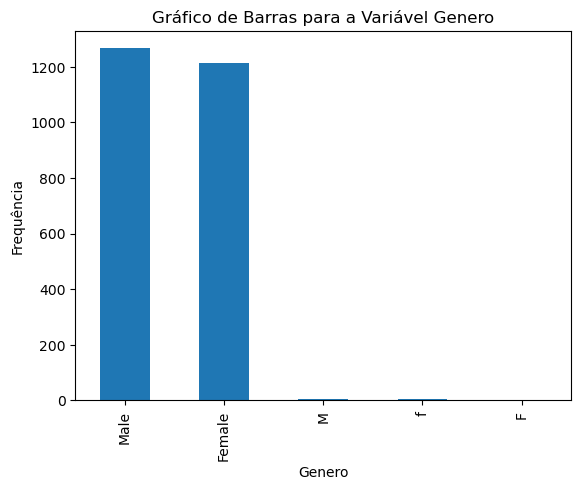

In [15]:
# Contagem dos valores da coluna de Genero
contagem_Genero = df['Genero'].value_counts()

# Calculando a porcentagem para que apareça no gráfico
porcentagem_Genero = (contagem_Genero / contagem_Genero.sum()) * 100
ax = contagem_Genero.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável Genero')
plt.xlabel('Genero')
plt.ylabel('Frequência')
plt.show()

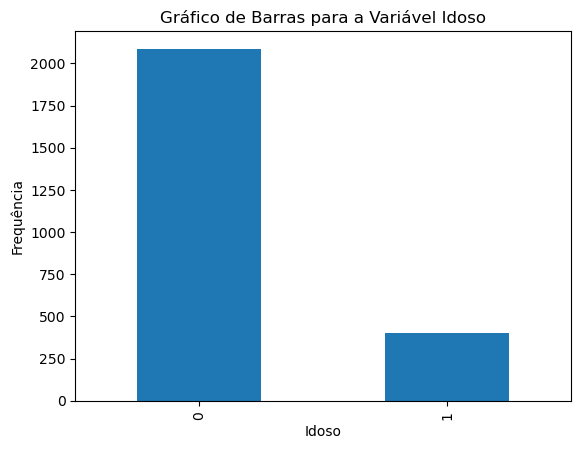

In [16]:
# Contagem dos valores da coluna de Idoso
contagem_Idoso = df['Idoso'].value_counts()

# Calculando a porcentagem para que apareça no gráfico
porcentagem_Idoso = (contagem_Idoso / contagem_Idoso.sum()) * 100
ax = contagem_Idoso.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável Idoso')
plt.xlabel('Idoso')
plt.ylabel('Frequência')
plt.show()

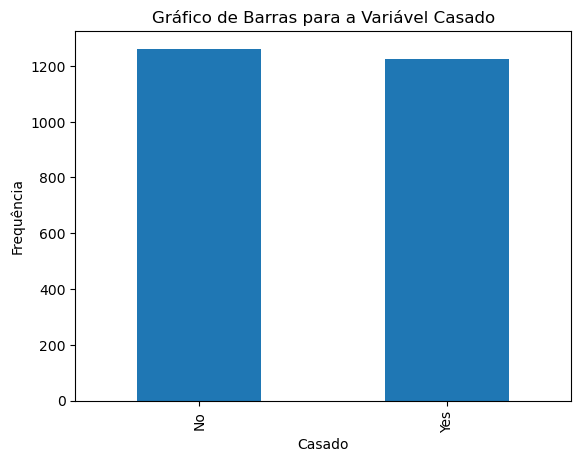

In [17]:
# Contagem dos valores da coluna de Casado
contagem_Casado = df['Casado'].value_counts()

# Calculando a porcentagem para que apareça no gráfico
porcentagem_Casado = (contagem_Casado / contagem_Casado.sum()) * 100
ax = contagem_Casado.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável Casado')
plt.xlabel('Casado')
plt.ylabel('Frequência')
plt.show()

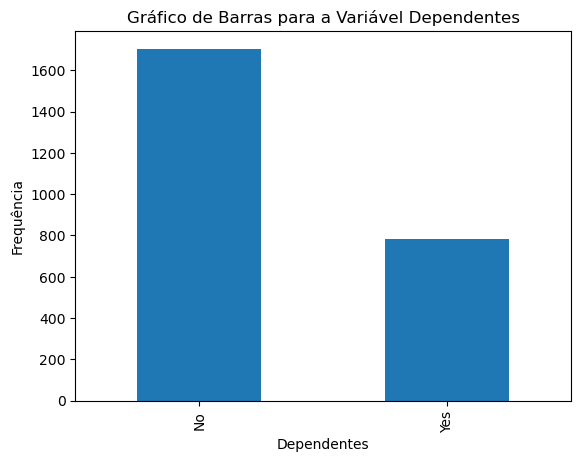

In [18]:
# Contagem dos valores da coluna de Dependentes
contagem_Dependentes = df['Dependentes'].value_counts()

# Calculando a porcentagem para que apareça no gráfico
porcentagem_Dependentes = (contagem_Dependentes / contagem_Dependentes.sum()) * 100
ax = contagem_Dependentes.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável Dependentes')
plt.xlabel('Dependentes')
plt.ylabel('Frequência')
plt.show()

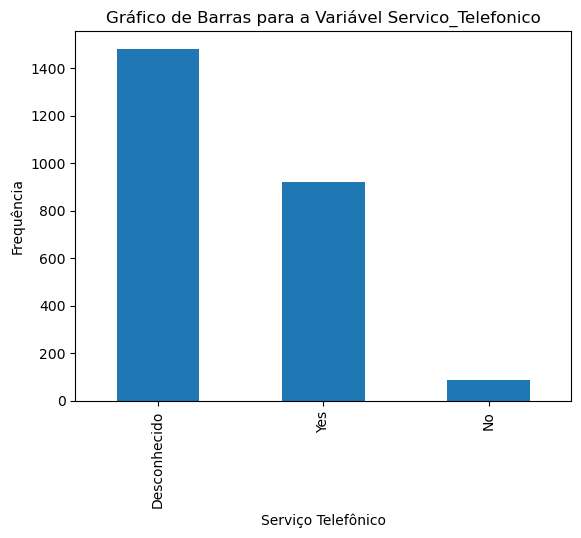

In [19]:
# Contagem dos valores da coluna de Servico_Telefonico
contagem_Servico_Telefonico = df['Servico_Telefonico'].value_counts()

# Calculando a porcentagem para que apareça no gráfico
porcentagem_Servico_Telefonico = (contagem_Servico_Telefonico / contagem_Servico_Telefonico.sum()) * 100
ax = contagem_Servico_Telefonico.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável Servico_Telefonico')
plt.xlabel('Serviço Telefônico')
plt.ylabel('Frequência')
plt.show()

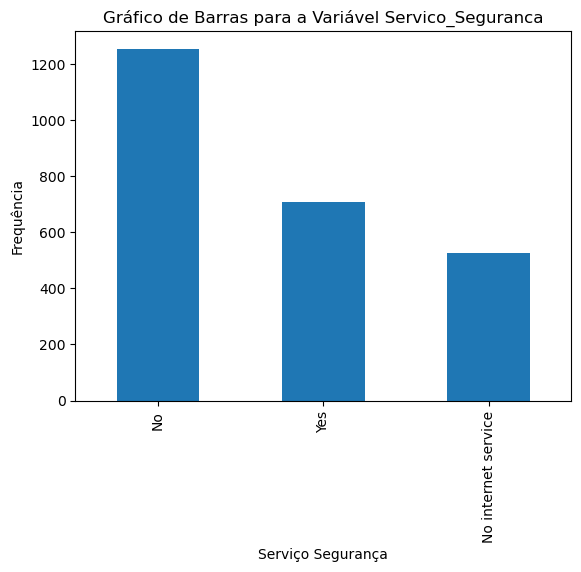

In [20]:
# Contagem dos valores da coluna de Servico_Seguranca
contagem_Servico_Seguranca = df['Servico_Seguranca'].value_counts()

# Calculando a porcentagem para que apareça no gráfico
porcentagem_Servico_Seguranca = (contagem_Servico_Seguranca / contagem_Servico_Seguranca.sum()) * 100
ax = contagem_Servico_Seguranca.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável Servico_Seguranca')
plt.xlabel('Serviço Segurança')
plt.ylabel('Frequência')
plt.show()

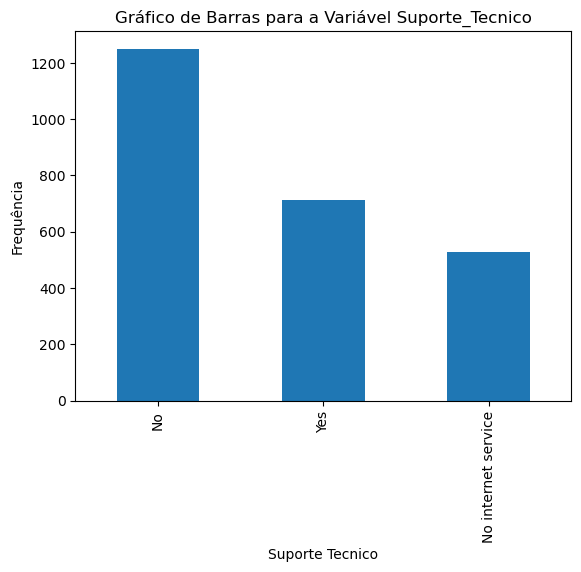

In [21]:
# Contagem dos valores da coluna de Suporte_Tecnico
contagem_Suporte_Tecnico = df['Suporte_Tecnico'].value_counts()

# Calculando a porcentagem para que apareça no gráfico
porcentagem_Suporte_Tecnico = (contagem_Suporte_Tecnico / contagem_Suporte_Tecnico.sum()) * 100
ax = contagem_Suporte_Tecnico.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável Suporte_Tecnico')
plt.xlabel('Suporte Tecnico')
plt.ylabel('Frequência')
plt.show()

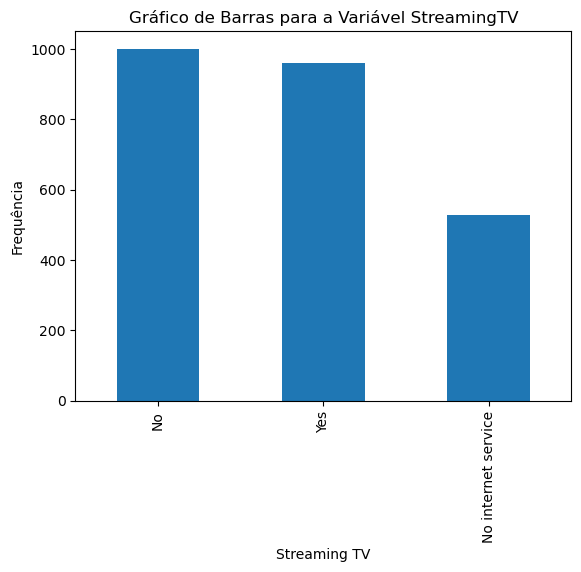

In [22]:
# Contagem dos valores da coluna de StreamingTV
contagem_StreamingTV = df['StreamingTV'].value_counts()

# Calculando a porcentagem para que apareça no gráfico
porcentagem_StreamingTV = (contagem_StreamingTV / contagem_StreamingTV.sum()) * 100
ax = contagem_StreamingTV.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável StreamingTV')
plt.xlabel('Streaming TV')
plt.ylabel('Frequência')
plt.show()

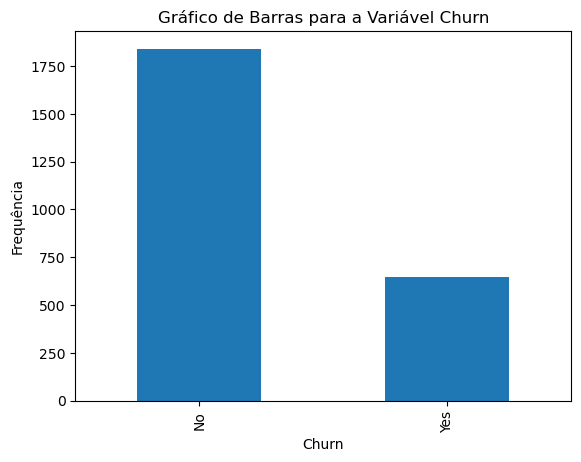

In [23]:
# Contagem dos valores da coluna de Churn
contagem_Churn = df['Churn'].value_counts()

# Calculando a porcentagem para que apareça no gráfico
porcentagem_Churn = (contagem_Churn / contagem_Churn.sum()) * 100
ax = contagem_Churn.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável Churn')
plt.xlabel('Churn')
plt.ylabel('Frequência')
plt.show()

# RESPOSTA DA LETRA D

Temos 4 variáveis boleanas, 4 que possuem a opção de sim, não e não possui serviço de internet que também encaixei neste quesito e a variável churn que é o nosso rótulo.
Das 9 variáveis foi verificado que somente as colunas **Genero** e **Casado** estão balanceadas. Todas as colunas a seguir encontran-se desbalanceadas, são elas:

**- Idoso**

**- Dependentes**

**- Servico_Telefonico**

**- Servico_Seguranca**

**- Suporte_Tecnico**

**- StreamingTV**

**- Churn**

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


In [29]:
#Para confirmar se realmente não tem outlier na variavel Total_Pago
Q1 = df['Total_Pago'].quantile(0.25)
Q3 = df['Total_Pago'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os possíveis outliers
outliers = df[(df['Total_Pago'] < limite_inferior) | (df['Total_Pago'] > limite_superior)]
print(outliers)

Empty DataFrame
Columns: [customerID, Genero, Idoso, Casado, Dependentes, Tempo_como_Cliente, Servico_Telefonico, Servico_Internet, Servico_Seguranca, Suporte_Tecnico, StreamingTV, Tipo_Contrato, Forma_Pagamento, Pagamento_Mensal, Total_Pago, Churn]
Index: []


# RESPOSTA A PERGUNTA 3

## Variáveis numéricas:

Tinhamos três variáveis numéricas,sendo elas:

**- Pagamento_Mensal:** Após analisar o BoxPlot desta variável pude confirmar que não havia presença de outliers visiveis. No entanto, como a mediana era maior que a média gerei um segundo gráfico, o histograma. Nele verifiquei que tinha picos em 20 e em 80, mas não se configurava um outlier. **Portanto esta variável não possui outliers.**

**- Total_Pago:** Após analisar o BoxPlot, verifiquei uma grande quantidade de valores no lado direito(superior) do gráfico. Afim de confirmar se tinha ou não outliers, gerei um histograma que confirmou a analise no gráfico anterior. Os valores se concentravam em maior quantidade entre 0 e 4000, com um declineo significativo entre 0 e 2000. Proximo a 8000 a frequencia era bem baixa. Como ainda não estava certa se tinha ou não outiliers nesta variável, realizei o calculo interquartil e nele confirmei que de fato **não existe outiliers nesta variável.**

**- Tempo_como_Cliente:** Esta variável tinha valores 0, então gerei dois boxplot, um com os valores 0 e outro sem eles. Embora pude confirmar uma grande amplitude, **não detectei a presença de outliers em ambos os gráficos.**

## Variáveis categoricas e booleanas
As demais variáveis eram bolleanas ou categoricas, nestes casos pude identificar a presença de desbalanceamento, mas não de outlier.

# Resposta Final
Com base nos gráficos e estatíticas observadas anteriormente não localizei nenhum outlier para ser tratado nesta base, somente desbalanceamento em algumas colunas.

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

In [31]:
df['Genero'].value_counts()

Genero
Male      1265
Female    1212
M            4
f            4
F            3
Name: count, dtype: int64

In [32]:
# Ajustando os valores da coluna Genero
df['Genero'] = df['Genero'].replace({
    'M': 'Male',
    'f': 'Female',
    'F': 'Female'
})

# Conferindo os valores únicos após a substituição
print(df['Genero'].unique())

['Female' 'Male']


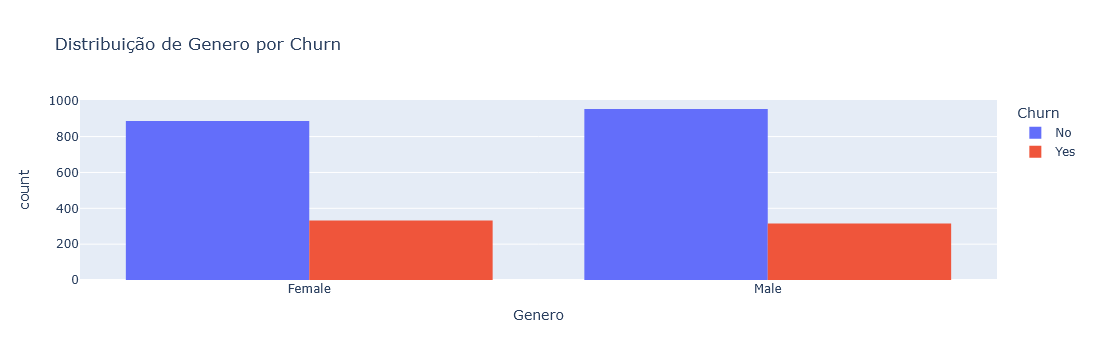

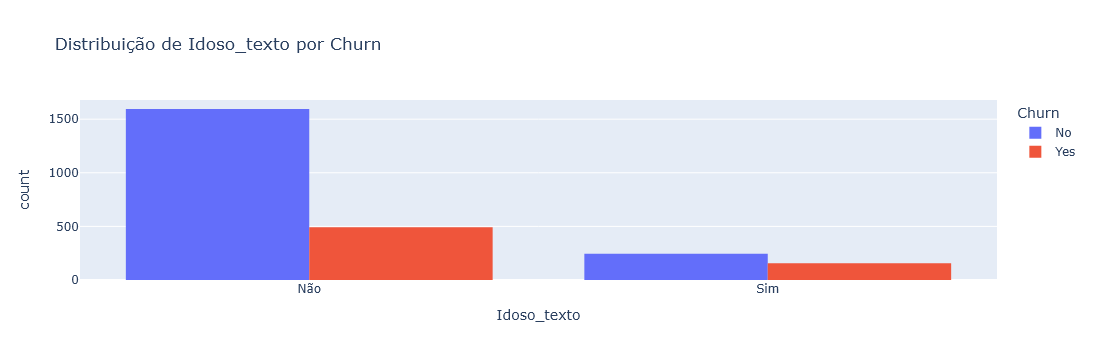

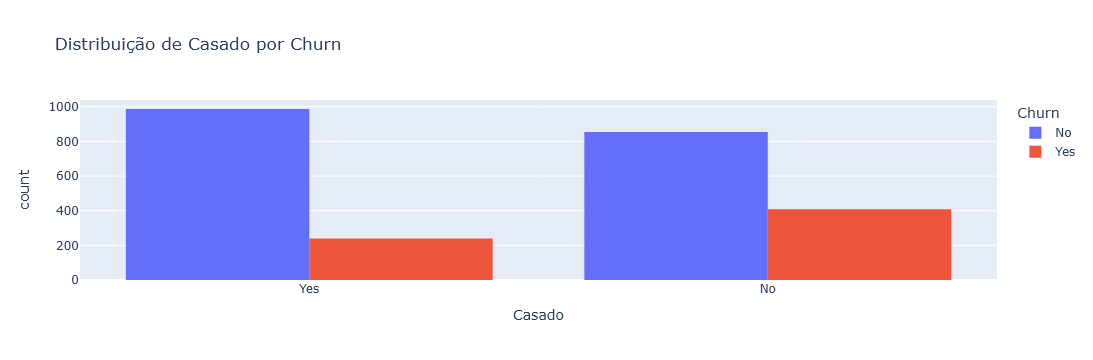

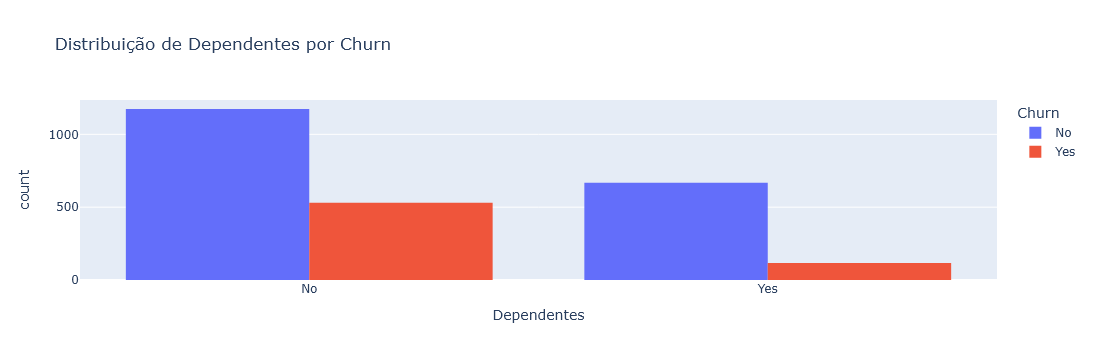

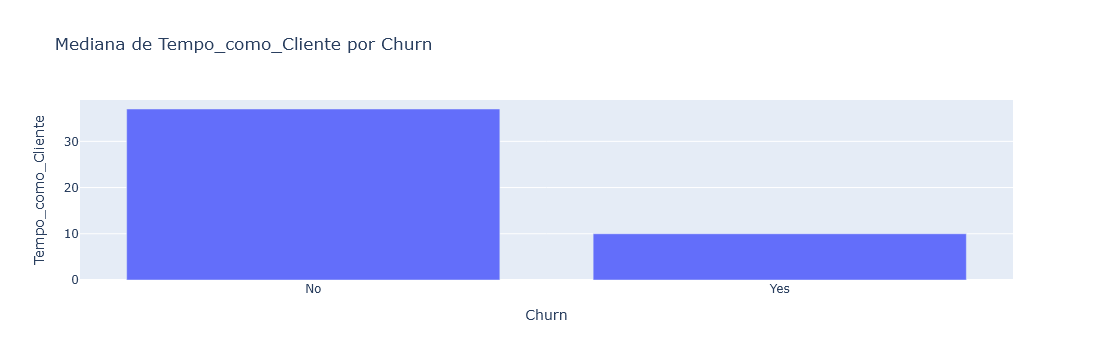

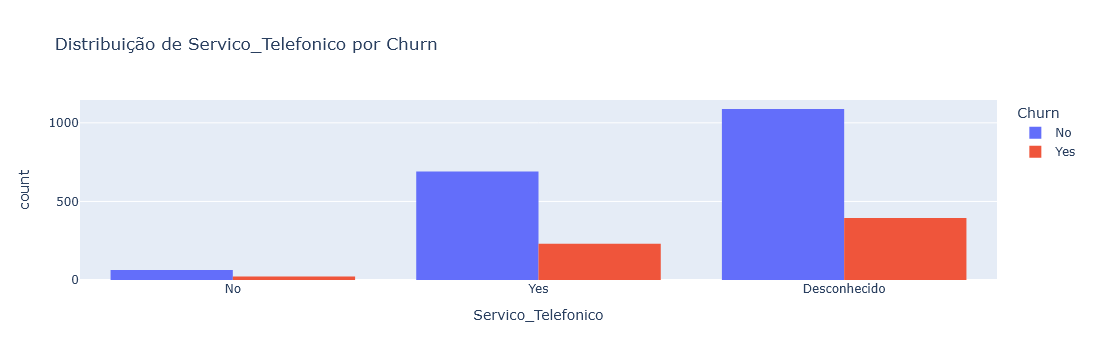

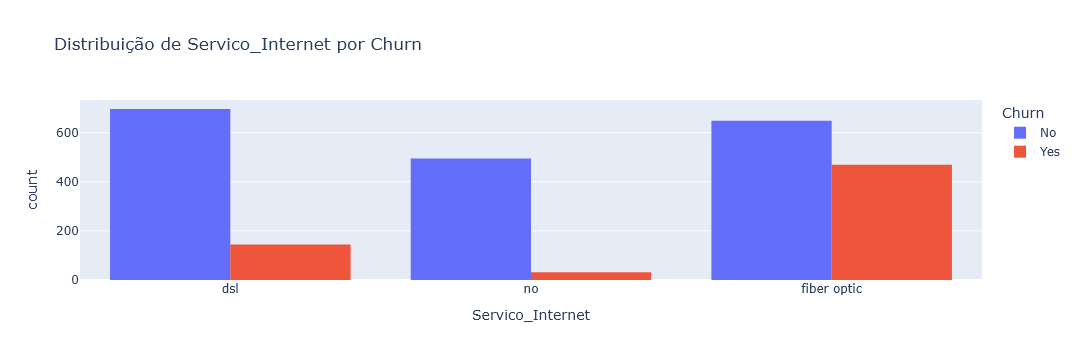

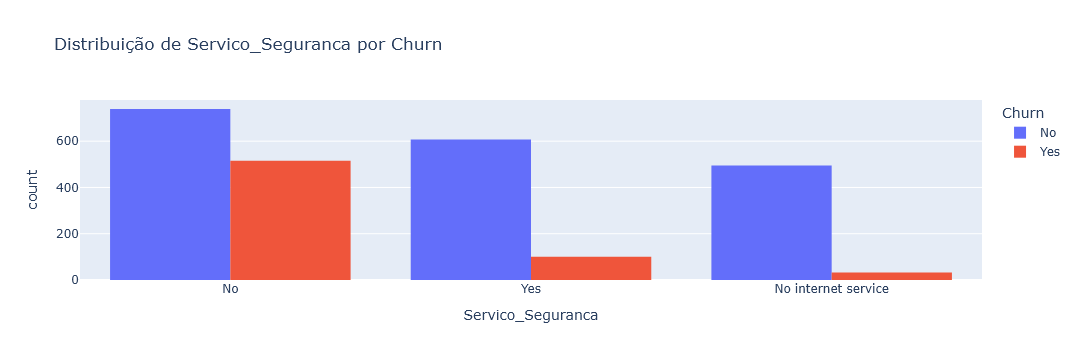

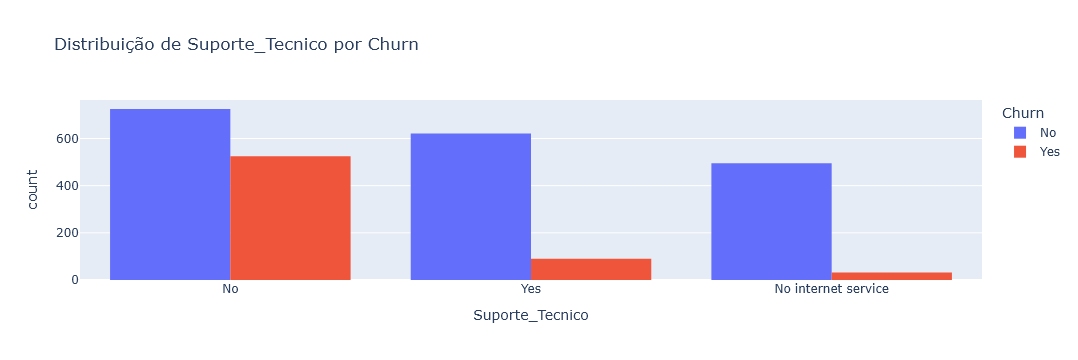

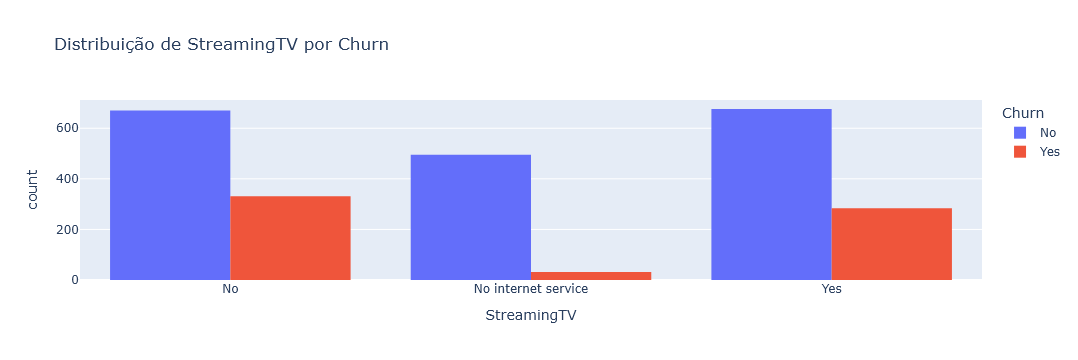

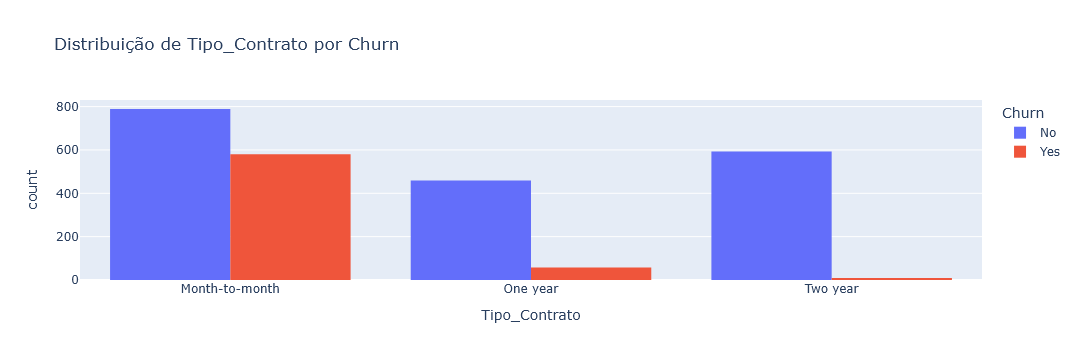

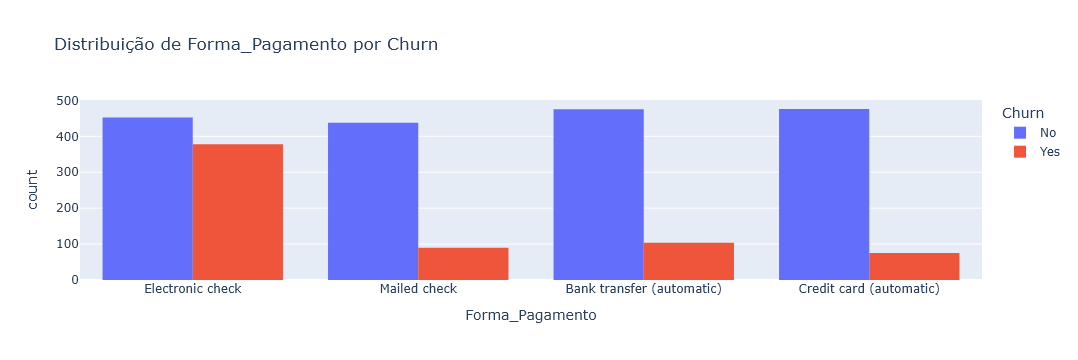

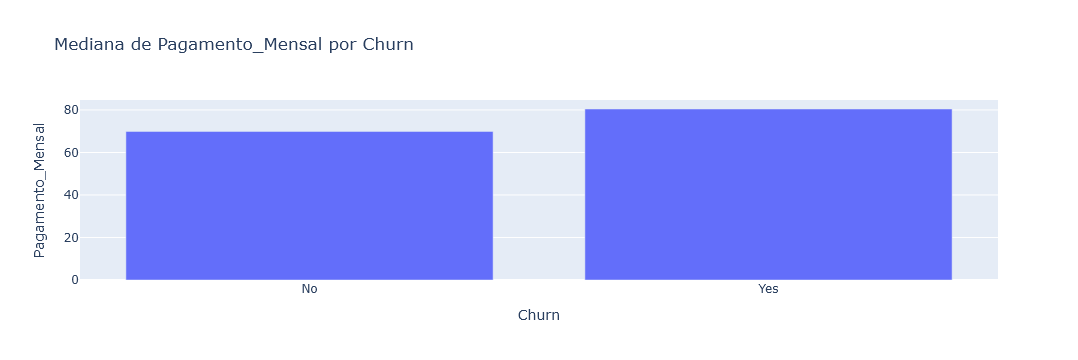

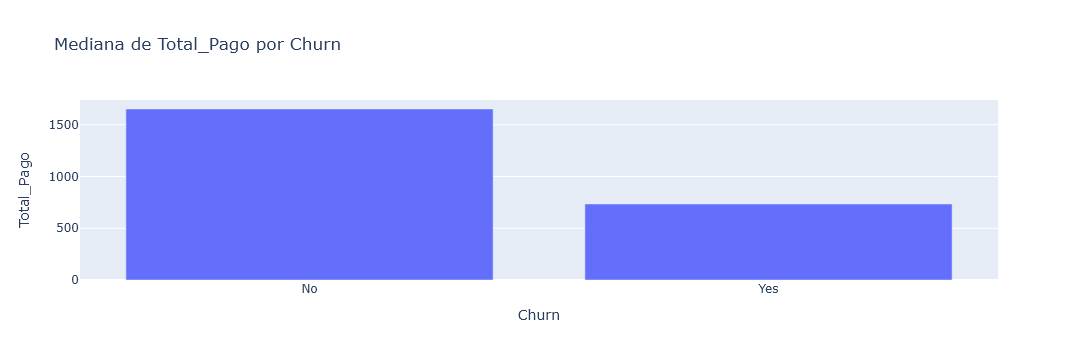

In [35]:
# Criando versões textuais das variáveis booleanas
df['Idoso_texto'] = df['Idoso'].map({0: 'Não', 1: 'Sim'})

# Lista de colunas originais + novas versões textuais
colunas = [
    'Genero', 'Idoso_texto', 'Casado', 'Dependentes', 'Tempo_como_Cliente',
    'Servico_Telefonico', 'Servico_Internet', 'Servico_Seguranca',
    'Suporte_Tecnico', 'StreamingTV', 'Tipo_Contrato', 'Forma_Pagamento',
    'Pagamento_Mensal', 'Total_Pago'
]

# Loop para gerar um gráfico para cada coluna
for col in colunas:
    if df[col].dtype in ['int64', 'float64']:
        # Numéricas → gráfico de mediana
        mediana = df.groupby('Churn')[col].median().reset_index()
        fig = px.bar(mediana, x='Churn', y=col,
                     title=f'Mediana de {col} por Churn')
    else:
        # Categóricas → gráfico de contagem
        fig = px.histogram(df, x=col, color='Churn', barmode='group',
                           title=f'Distribuição de {col} por Churn')
    
    fig.show()

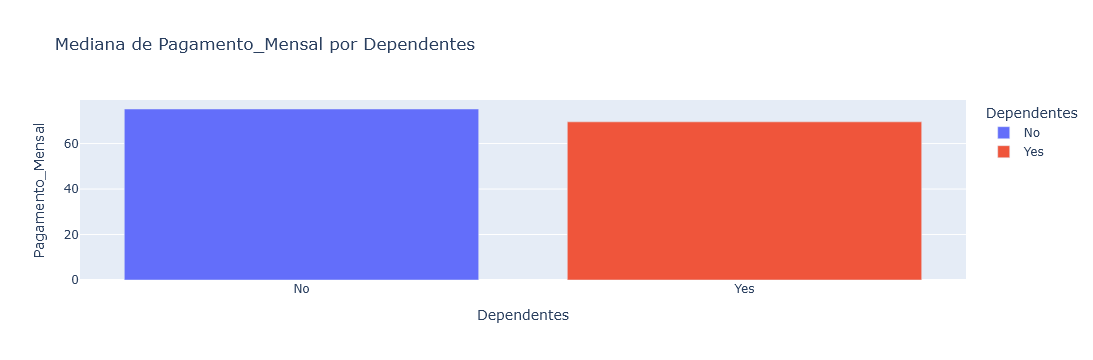

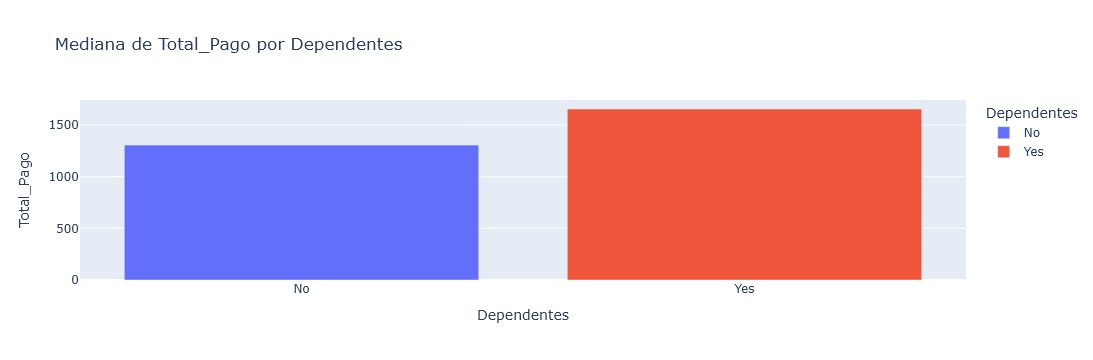

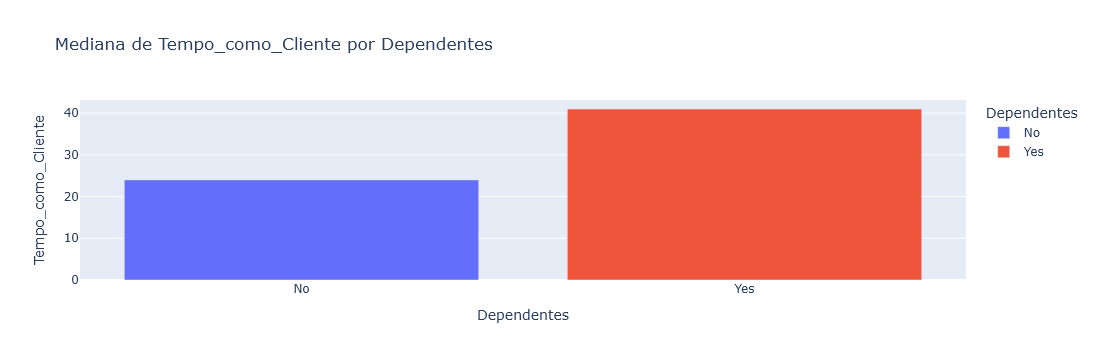

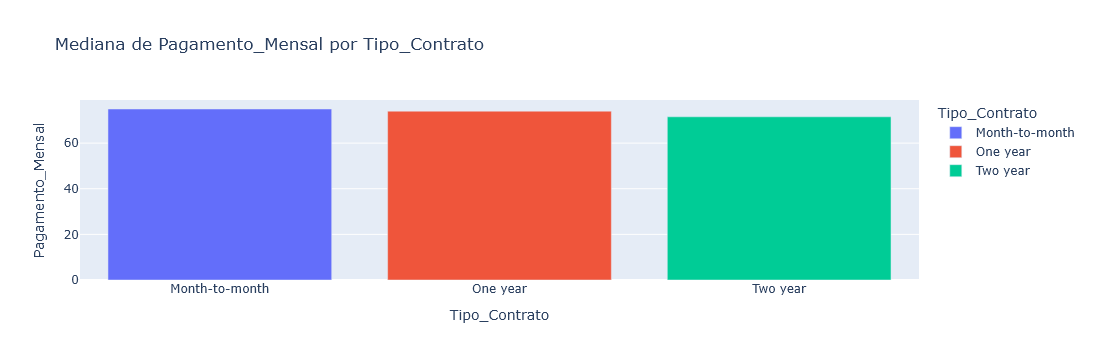

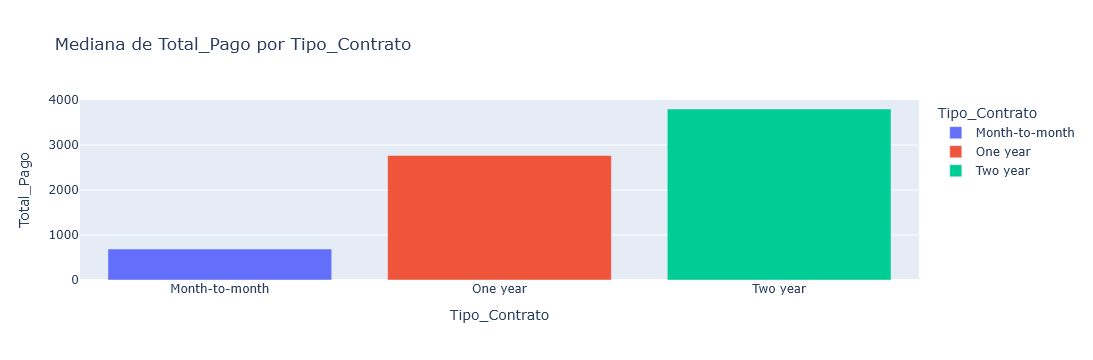

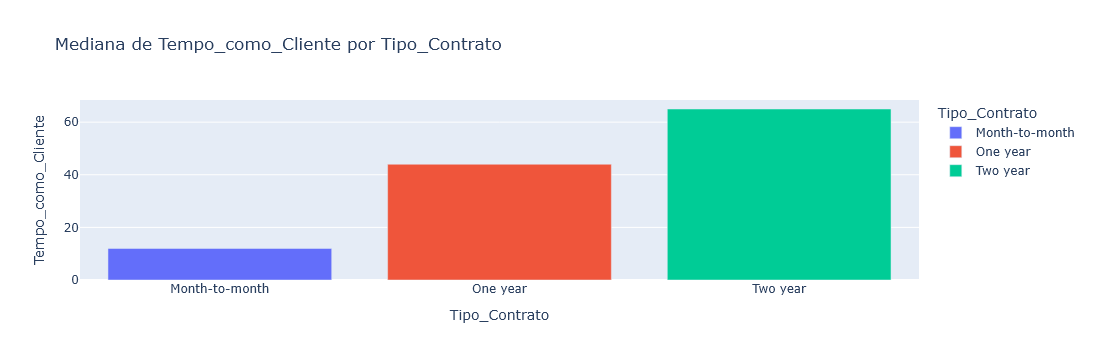

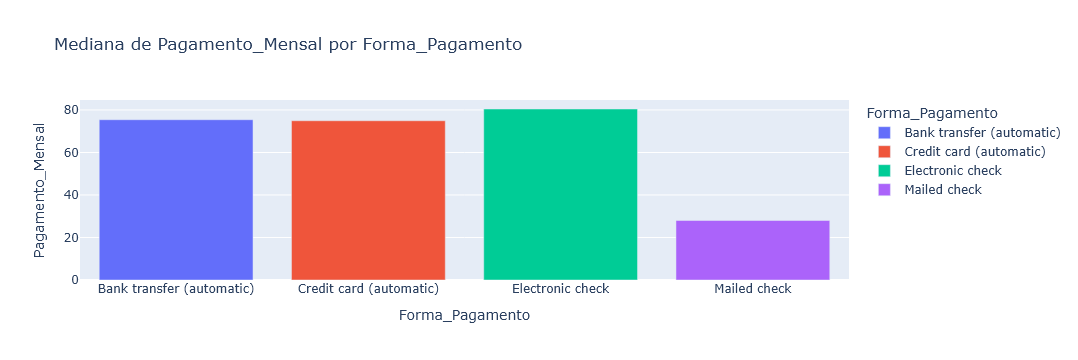

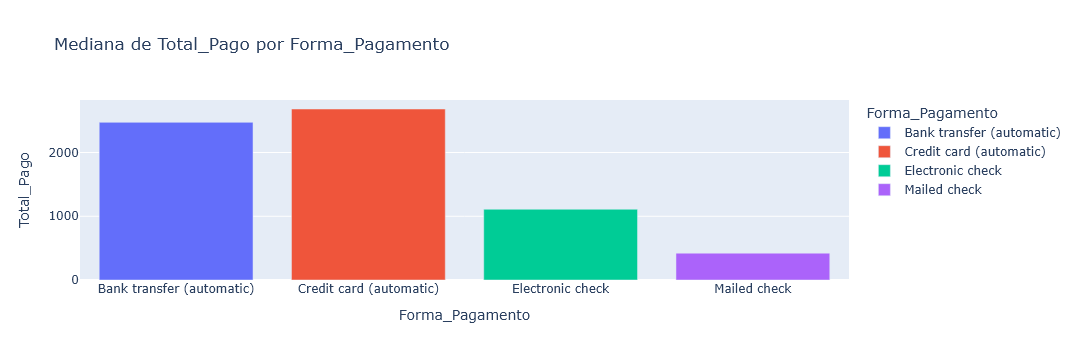

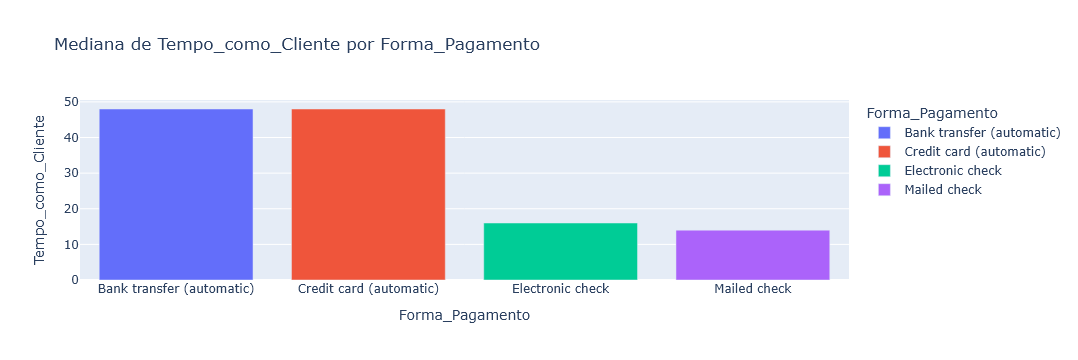

In [36]:
categoricas = ['Dependentes', 'Tipo_Contrato', 'Forma_Pagamento']
numericas = ['Pagamento_Mensal', 'Total_Pago', 'Tempo_como_Cliente']

# Loop para gerar gráficos de barras
for cat in categoricas:
    for num in numericas:
        # Calcula a mediana da variável numérica por categoria
        resumo = df.groupby(cat)[num].median().reset_index()
        
        # Cria gráfico de barras
        fig = px.bar(resumo, x=cat, y=num,
                     title=f'Mediana de {num} por {cat}',
                     color=cat)
        fig.show()


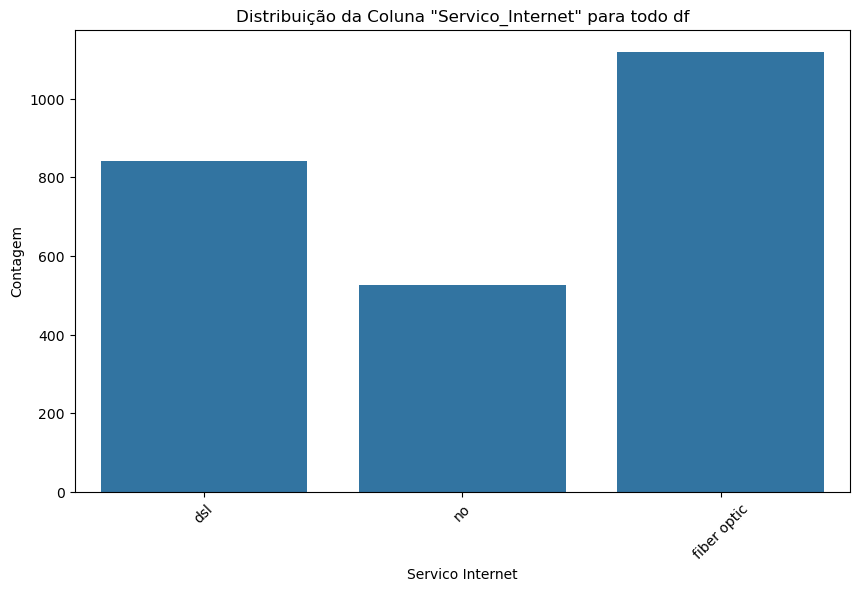

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Servico_Internet')
plt.title('Distribuição da Coluna "Servico_Internet" para todo df')
plt.xlabel('Servico Internet')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

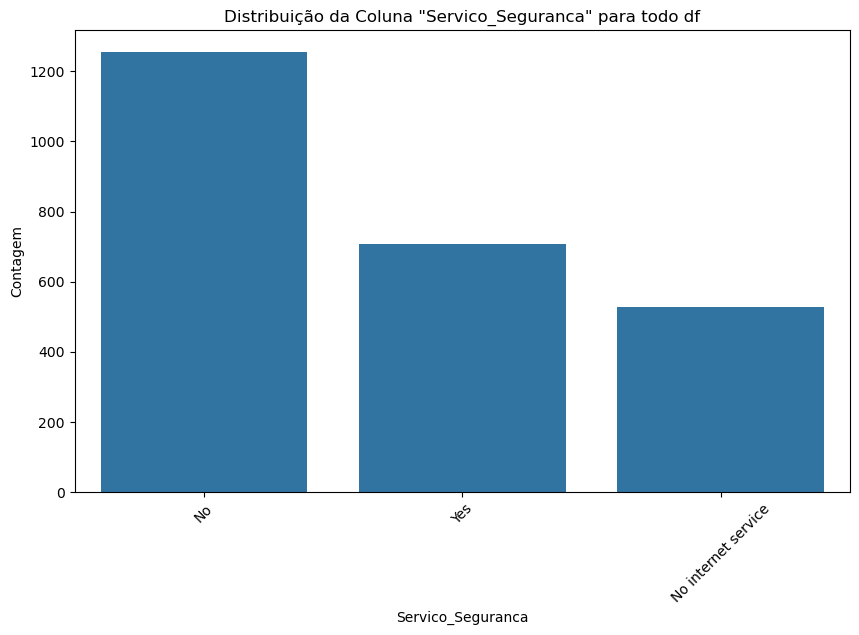

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Servico_Seguranca')
plt.title('Distribuição da Coluna "Servico_Seguranca" para todo df')
plt.xlabel('Servico_Seguranca')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

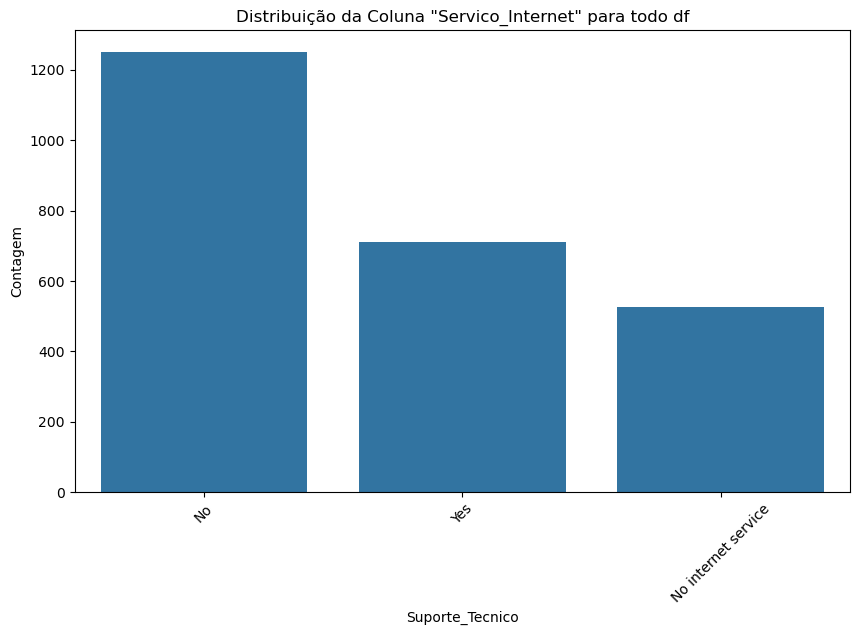

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Suporte_Tecnico')
plt.title('Distribuição da Coluna "Servico_Internet" para todo df')
plt.xlabel('Suporte_Tecnico')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

# RESPOSTAS DAS LETRAS A E B DA QUESTÃO 4
## PERGUNTAS:

- Qual a relação de cada variavel da base com o churn?

- Qual a relação das variáveis categóricas:

      - Dependentes,
      - Tipo_Contrato,
      - Forma_Pagamento 

com as seguintes variáveis numéricas: 

    - Pagamento_Mensal, 
    - Total_Pag, 
    - Tempo_como_Cliente?

## INSIGHTS OBTIDOS APÓS A VISUALIZAÇÃO DOS GRÁFICOS:

    - Quanto maior o tempo de casa (Tempo_como_Cliente) menor as chances de ter churn.
    - Em total_Pago pude verificar que quanto menor é o pagamento total, maiores as chances de churn.
    - Quando tem dependentes o tempo como clientes é maior.
    - No tipo de contrato, quando é mês-a-mês o total pago é menor. Em um ano é mais que o dobro do mensal e o dois anos é o que tem o maior valor de total pago.
    - Na relação tipo de contrato com o tempo como cliente, o gráfico se mostra parecido com o anterior.O tipo mês-a-mês é o que tem o menor tempo e o tipo dois anos é o que tem o maior tempo.
    - Na relação pagamento mensal com forma de pagamento o mail check é o que tem o menor valor.
    - Na relação total pago com forma de pagamento o que tem o maior valor de total pago é o credit card, seguido pelo bank transfer, ambos automaticos.
    - Na relação tempo como cliente com forma de pagamento pude notar que as duas formas de pagamento automática é o que tem o maior tempo como cliente. 

Com isso **chego a conclusão** que o tempo de casa e o total pago influênciam no churn. Quanto maiores são eles dois, menor é a quantidade de churns positivos. A variável total pago tem relação com:

    1 - Forma_Pagamento do tipo mês-a-mês, o total pago é menor quando é esta a forma de pagamento escolhida. 
    2 - Tipo_Contrato, quando é mensal o total pago tem o menor valor, quando é de um em um ano ou de dois em dois anos o valor é maior.

A variável tempo como cliente tem relação com:
    
    1 - dependentes, quando possui dependentes o tempo como cliente é maior.
    2 - Tipo_Contrato com o tipo mês-a-mês, nesse tipo o tempo como cliente diminui.
    3 - Forma_Pagamento, quando é uma forma de pagamento automática(ambas que estão na base) o tempo como cliente é maior.